## Adaboost Model- Heart

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.duplicated().sum()

1

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(302, 14)

In [6]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [7]:
df['target'].value_counts(normalize=True)

target
1    0.543046
0    0.456954
Name: proportion, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


### Feature Selection

In [ ]:
1. Filter Method
2. Wrapper Method
3. Embedded Method:
    Mostly Tree Based Models(Feature Importance)

### Model Training

In [15]:
x = df.drop('target',axis=1)
y = df['target']

x_train, x_test, y_train, y_test  = train_test_split(x, y ,test_size=0.2, random_state=11, stratify=y)

In [31]:
adb_clf = AdaBoostClassifier(learning_rate=0.5,random_state=20)
adb_clf.fit(x_train, y_train)   # storing all training datapoints

AdaBoostClassifier(learning_rate=0.5, random_state=20)

### Evaluation`

In [17]:
def evaluation(string, model, ind_var, act):
    print(string.center(50, '*'))
    pred = model.predict(ind_var)

    cnf_matrix = confusion_matrix(act, pred)
    print('Confusion Matrix : \n', cnf_matrix)

    mat_coef = matthews_corrcoef(act, pred)
    print('Matthews Correlation Coefficient:', mat_coef)

    clf_report = classification_report(act,pred)
    print('Classification Report :\n', clf_report)

In [32]:
evaluation('Train Data Evaluation', adb_clf, x_train, y_train)

**************Train Data Evaluation***************
Confusion Matrix : 
 [[ 92  18]
 [  9 122]]
Matthews Correlation Coefficient: 0.7749558463778614
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       110
           1       0.87      0.93      0.90       131

    accuracy                           0.89       241
   macro avg       0.89      0.88      0.89       241
weighted avg       0.89      0.89      0.89       241



In [33]:
evaluation('Test Data Evaluation', adb_clf, x_test, y_test)

***************Test Data Evaluation***************
Confusion Matrix : 
 [[23  5]
 [ 3 30]]
Matthews Correlation Coefficient: 0.7361174128087679
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.86      0.91      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



### Hyperparameters Tuning

In [21]:
adb_model = AdaBoostClassifier(random_state=20)

param_grid = {'n_estimators':np.arange(20,120,5) ,'learning_rate':np.arange(0.01, 5, 0.05),
    'algorithm':['SAMME', 'SAMME.R'] }

rscv_adb_clf = RandomizedSearchCV(adb_model, param_grid, cv=3, scoring='recall',n_iter=150)
rscv_adb_clf.fit(x_train, y_train)
rscv_adb_clf.best_estimator_

AdaBoostClassifier(learning_rate=3.96, n_estimators=55, random_state=20)

In [22]:
rscv_adb_clf.best_params_

{'n_estimators': 55, 'learning_rate': 3.96, 'algorithm': 'SAMME.R'}

In [23]:
adb_clf = adb_model.set_params(**rscv_adb_clf.best_params_)
adb_clf

AdaBoostClassifier(learning_rate=3.96, n_estimators=55, random_state=20)

In [25]:
# adb_clf = RandomForestClassifier(criterion='entropy', max_depth=7, max_samples=0.75,
#                        min_samples_leaf=11, min_samples_split=7, oob_score=True,
#                        n_estimators=45, random_state=11)
adb_clf = rscv_adb_clf.best_estimator_
adb_clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=3.96, n_estimators=55, random_state=20)

In [26]:
evaluation('Train Data Evaluation', adb_clf, x_train, y_train)
print('**'*70)
evaluation('Test Data Evaluation', adb_clf, x_test, y_test)

**************Train Data Evaluation***************
Confusion Matrix : 
 [[ 80  30]
 [ 31 100]]
Matthews Correlation Coefficient: 0.4902913800304899
Classification Report :
               precision    recall  f1-score   support

           0       0.72      0.73      0.72       110
           1       0.77      0.76      0.77       131

    accuracy                           0.75       241
   macro avg       0.74      0.75      0.75       241
weighted avg       0.75      0.75      0.75       241

********************************************************************************************************************************************
***************Test Data Evaluation***************
Confusion Matrix : 
 [[24  4]
 [ 8 25]]
Matthews Correlation Coefficient: 0.6133923594201466
Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.86      0.80        28
           1       0.86      0.76      0.81        33

    accuracy              

### Feature Importance

In [34]:
adb_clf.feature_importances_

array([0.2 , 0.04, 0.06, 0.12, 0.08, 0.  , 0.  , 0.1 , 0.04, 0.14, 0.06,
       0.12, 0.04])

In [35]:
sum(adb_clf.feature_importances_)

1.0

<Axes: >

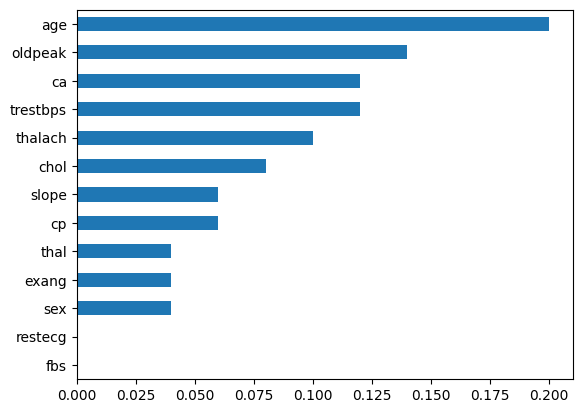

In [36]:
s1 = pd.Series(adb_clf.feature_importances_, index=x.columns)
s1.sort_values().plot(kind = 'barh')

In [40]:
# pip install xgboost

In [41]:
# pip install lightgbm

In [42]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [43]:
lgb_clf = LGBMClassifier(random_state=20)
lgb_clf.fit(x_train, y_train)

evaluation('Train Data Evaluation', lgb_clf, x_train, y_train)
print('**'*70)
evaluation('Test Data Evaluation', lgb_clf, x_test, y_test)

[LightGBM] [Info] Number of positive: 131, number of negative: 110
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 235
[LightGBM] [Info] Number of data points in the train set: 241, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.543568 -> initscore=0.174717
[LightGBM] [Info] Start training from score 0.174717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [44]:
xgb_clf = XGBClassifier(random_state=20)
xgb_clf.fit(x_train, y_train)

evaluation('Train Data Evaluation', xgb_clf, x_train, y_train)
print('**'*70)
evaluation('Test Data Evaluation', xgb_clf, x_test, y_test)

**************Train Data Evaluation***************
Confusion Matrix : 
 [[110   0]
 [  0 131]]
Matthews Correlation Coefficient: 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       131

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

********************************************************************************************************************************************
***************Test Data Evaluation***************
Confusion Matrix : 
 [[19  9]
 [ 3 30]]
Matthews Correlation Coefficient: 0.6098460287075423
Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.

In [ ]:
Cats Adoption:
    No days to adoption >> Adoption flag


Test >> 20%:
    1000 >> 20% >> 200
    10000 >> 20% >> 2000
    100000 >> 20% >> 20000
    1000000 >> 20% >> 200000

    10 % >> 100000